# Linear regression with Azure Machine Learning

We have examined building and fitting machine-learning (ML) models “locally.” To use these models, you would have to load data into your notebooks and get the results there.

In practice, we want those models to be accessible from a number of locations. And while the management of production ML models has a lifecycle all its own, one part of that is making models accessible from the web. One way to do so is to develop them by using third-party cloud tools, such as [Microsoft Azure Machine Learning](https://ml.azure.com/).

Cloud-based ML-development tools like Azure Machine Learning streamline the building, training, and deployment of machine-learning models by providing a drag-and-drop interface and making a wide array of ML algorithms and tools readily available. Crucially, such tools simplify the deployment and management of ML models in production (not a focus of this course, but a major consideration in the real world). Let's revisit our simple linear model from the last session using the social indicators dataset, this time in Azure Machine Learning.

> **Learning goal:** By the end of this section, you should be comfortable building ML models in Azure Machine Learning and publishing them as web services.

## Upload dataset

Now we will go to Azure Machine Learning and upload the UN11 dataset in this directory.

1. Open [Azure Machine Learning](https://ml.azure.com/) in a new browser tab and sign in with Microsoft credentials. Azure Machine Learning has two edition types: Basic and Enterprise. For this lesson, you will need the Enterprise edition if you want to follow along on your own. For more details about those, please [go here](https://azure.microsoft.com/en-us/pricing/details/machine-learning/) for pricing details.

2. In the left pane, click **Datasets** option.

3. Select **Create dataset** and choose **From local files**.

4. Follow the prompts to enter the dataset info and upload the **UN11.csv** file.
   

## Create a simple linear regression model

1. From the Home page, select **Create new** and then the option **Pipeline**. This will redirect you to the Designer page.

2. At the top of the new pipeline canvas, click in the name field (which reads “Pipeline-Created on [Date]”) and rename the pipeline to something descriptive (such as "Simple Linear Regression").

3. In the left panel, under **Datasets > My Datasets**, select **UN11.csv** and drag it onto the canvas.

4. In the left panel, under **Data Transformation > Manipulation**, click **Select Columns in Dataset** and drag it onto the canvas under the **UN11.csv** module.

5. Connect the **UN11.csv** module to **Select Columns in Dataset**.

6. Click the **Select Columns in Dataset** module if it is not selected. We will use it to select the columns from the dataset to use in the model.
    - In the panel on the right, on the **Select columns** field click **Edit columns** and a menu window will appear.
    - In the **Select columns** window, choose to Inclue the Column names **`lifeExpF`** and **`ppgdp`** as comma separated values. And then click **Save**.

7. In the left panel, under **Machine Learning Algoritms > Regression**, click **Linear Regression** and drag it onto the canvas next to the **Select Columns in Dataset** module.

8. Click the **Linear Regression** module. In the pane on the right, in the **Random number seed** field enter **`42`**; leave all other default values as they are.

9. In the left panel, under **Model Training**, click **Train Model** and drag it onto the canvas under both the **Linear Regression** and **Select Columns in Dataset** modules.

10. Connect **Linear Regression** to the upper-left part of the **Train Model** module, and then connect **Select Columns in Dataset** to the upper-right part of it.

11. Click on the **Train Model** module so that we will tell the model which column from the dataset should serve as response in the model.
    - In the panel on the right, click the **Edit column** button.
    - In the **Select a single column** window, select to include the column  **`lifeExpF`** and click **Save**.
        
12. In the left panel, under **Model Scoring & Evaluation**, click **Score Model** and drag it onto the canvas under both the **Train Model** and **Select Columns in Dataset** modules.

13. Connect **Train Model** to the upper-left part of the **Score Model** module, and then connect **Select Columns in Dataset** to the upper-right part of it. Leave the default settings for the module.

14. In the left pane, under **Model Scoring & Evaluation**, click **Evaluate Model** and drag it onto the canvas under the **Score Model** module.

15. Connect **Score Model** to the upper-left receptor of the **Evaluate Model** module.

16. On the upper right hand side of the page, select **Submit**.
    
17. Fill in the options to Set up pipline run. Select **Create new**, then enter a new experiment name and run description. Then click **Submit**. The model will take a few minutes to run. While it does, you can observe the status of each step in the pipeline.

After the run is complete, right click on Evaluate Model > Visualize Evaluation results, to see the $R^2$ score of our initial model.

With an $R^2$ score (referred to as the *Coefficient of Determination*) of 0.30, we got the score that we would expect (identical to what we got in the first section of this linear regression exploration).

## Manipulate the dataset

Let's now improve the score by transforming `ppgdp` to account for the logarithmic relationship between per-capita GDP and female life expectancy.

> **Technical note:** Now that you’re familiar with the Azure Machine Learning interface, procedures that follow in this section will only be as detailed as they were above when we encounter new functionality and aspects of the interface.

1. From **Data Transformations** in the left panel, add **Apply Math Operation** between the **UN11.csv** and **Select Columns in Dataset** modules.

2. Delete the connector between **UN11.csv** and **Select Columns in Dataset** and instead form the connections to run **UN11.csv -> Apply Math Operation -> Select Columns in Dataset**.

3. Click the **Apply Math Operation** module.
   - In the panel on the right, from the **Category** drop-down menu, select **Basic**.
   - In the **Basic math function** drop-down menu, select **Log10**.
   - For the **Column set field** select **Edit column**.
   - In the **Column set** window, select **column name**. In the field that appear beside that drop-down menu, enter or select **`ppgdp`** and click **Save**.
   - In the **Output mode** drop-down menu, select **Append**.
   
4. Click the **Select Columns in Dataset** module and then replace **`ppgdp`** with **`Log10(ppgdp)`** as one of the selected columns.

5. Select **Submit** to run a new version of the experiment.

6. After all of the modules have run, right-click the **Evaluate Model** module, and then select **Visualize Evaluation results**.

Our new model now has an $R^2$ score of 0.60, which is exactly what we expected.

## Multiple regression revisited

We saw previously that we could extract more complex relationships in the data by including more predictors in our model. This is extremely easy to do in Azure Machine Learning: all we have to do is include more columns in our model.

> **Exercise**
>
> Go back into your experiment and alter it to include the `pctUrban` column. (**Hint:** Use the **Launch column selector** on the **Select Columns in Dataset** module. Be sure to include `Log10(ppgdp)` and `lifeExpF` in addition to `pctUrban`.)

> **Question**
>
> What was your $R^2$ score for the enhanced model? Is it what you were expecting?

Of course, as easy as it is to add columns, we should see what happens when we include all of the columns.

1. Click the **Select Columns in Dataset** module and then the **Launch column selector** button.

2. In the **Select columns** window panel, add the columns **region**, **group**, and **fertility**, and then **Save**.

3. Run the experiment again and check the new $R^2$ score.

Clearly 0.81 is a much better $R^2$ score, which serves to demonstrate that there is a lot of information supplied by the other features. But how is Azure ML Studio handling the categorical features?

## Splitting data

So far in this section and Section 3.1, we have been committing a fairly serious data-science sin in the name of instructional clarity: we have not been splitting our data into test and training sets. This made sense while we were exploring the mechanics of linear regression, but now it's time to start handling our data correctly.

1. On the experiment canvas in Azure ML Studio, delete the connections between **Select Columns in Dataset** and the **Train Model** and **Score Model** modules.

2. From the left pane, under **Data Transformation** drag **Split Data** under the **Select Columns in Dataset** module.

3. In the properties panel for the **Split Data** module, enter `0.7` for **Fraction of rows in the first output dataset**, and enter `42` for **Random seed**. Leave the default values for all other settings.

4. Connect **Select Columns in Dataset** to the top of the **Split Data** module, connect the lower-left circle in the **Split Data** module to the upper-right receptor in the **Train Model** module, and connect the lower-right circle to the upper-right receptor in the **Score Model** module.

 > **Technical note:** The order of these connections (whether from the left side or the right side of the **Split Data** module) does matter.
 
5. Run this experiment now with the split data and evaluate its $R^2$ score (right-click the bottom-center circle of the **Evaluate Model** module and select **Visualize**).

Our $R^2$ score dropped to 0.79. This is a sure sign that without splitting the data, we were overfitting the model. Recall, however, that we set the random seed for our data splitting so that it would split the data the same way each time.

> **Exercise**
>
> Return to the **Split Data** module and change the random seed value to a different number. Run the experiment a few times with different seeds and compare the $R^2$ value for the runs.

> **Question**
>
> Why do you think that different values for the random seed would produce different $R^2$ values?

Clearly, some splits of the training data fit models that perform slightly better against a particular split of test data. What if we could split the data several times and see how our model does against all of those splits?

## Cross validation

The idea behind cross validation is that a single set of data is split multiple times between test and training data and evaluated. Each iteration of the splitting of this data is referred to as a “fold.” For example, using 10 folds to evaluate a model is 10-fold cross validation (note that data scientists speak more generally of $k$-fold cross validation). The resulting score for a given model is the average of its performance against all of the different folds.

Let's compare cross validation to regular data splitting.

1. From the left pane under **Machine Learning Algorithms > Regression**, take another **Linear Regression** module and drag it onto the canvas somewhere to the right of your current stack of modules.

2. In the properties panel of this new **Linear Regression** module, make sure that you have the same settings as in the original **Linear Regression** module (L2 regularization weight = 0.001 and Random number seed = 42).

3. In the left pane, under **Machine Scoring & Evaluation > Evaluate**, click **Cross Validate Model** and drag that module onto the canvas under the new **Linear Regression** module.

4. Connect the new **Linear Regression** module to the **upper-left** receptor on the **Cross Validate Model** module (the receptor does matter).

5. Connect the lower-left output from the **Split Data** module to the upper-right receptor in the **Cross Validate Model** module.

 > **Technical note:** Although you would normally not split your data before running it though cross validation, we're doing so here to make a more apples-to-apples comparison of models evaluated with and without cross validation.

6. In the **Cross Validate Model** panel, set the random seed to `42` and select the `lifeExpF` column.

7. Connect the **lower-left** output from the **Cross Validate Model** module to the upper-right receptor in the **Evaluate Model** module.

8. Run a new experiment and once complete select to Visualize Evaluation results (right-click the bottom of the **Evaluate Model** module) when all modules have finished running. (**Note:** It might take several minutes for the cross validation to run.)

The cross-validation results on are on the right. They have a lower mean absolute error, meaning that it made smaller mistakes in prediction, on average, than did the model fitted by using regular data splitting. (This is borne out by the greater number of small errors in the histogram for the cross-validation results.) That said, it has a lower $R^2$ score than the normal data-splitting on the left. This doesn't mean that it did worse; the two models are identical, were fitted using the same training data, and were compared using the same test data. What this means is that the cross-validation results are a more accurate representation of the $R^2$ score running this model against different datasets.

> **Technical note:** Cross validation can given you a more consistent picture of your model's performance against new data. This is important in production applications, but one tradeoff that comes with it is computational time: your model completes an entire run for each fold of your cross validation. For computationally intense models, including many folds in cross validation might not be feasible.

What do the results for the individual folds look like? To see the results, right-click the lower-right output circle in the **Cross Validate Model** module and select **Visualize**.

As you can see from the report, some folds were very good and some were spectacularly bad.

> **Exercise**
>
> Delete the connection between the **Split Data** and **Cross Validate Model** modules and connect the output from the **Select Columns in Dataset** module to the upper-right receptor in the **Cross Validate Model** module. Re-run the experiment and review the evaluation report.

> **Question**
>
> Why are the $R^2$ scores now much more similar?

Splitting our data for training can help combat overfitting, and cross validation can give us a better idea of how our model might perform on new datasets. But what can we do about outliers in our training data?

## Ridge regression

Outliers in our training data -- data points that stray from the general clustering of other data points -- are problematic because they skew our model while we’re fitting it. To see this, let's look at some simplified synthetic data. Beyond pandas, we’ll also need NumPy and matplotlib to demonstrate this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge

We'll create a `DataFrame` with points that are mostly regularly clustered but with two outliers added.

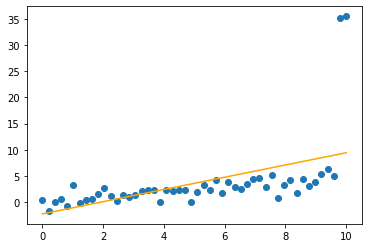

In [2]:
np.random.RandomState(seed=42)

N = 50

X = np.linspace(0, 10, N)
y = 0.5*X + np.random.randn(N)

y[-1] += 30
y[-2] += 30

model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], y)

X_plot = X
y_plot = model.predict(X_plot[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_plot, y_plot, c='orange');

The outliers have dragged our regression line off of the cluster. One way to address this is to add an additional, weighted term to the [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) equation that we used to calculate our regression line. Tuning this weight parameter for this additional term will help our regression put less emphasis on the outlying points and greater emphasis on the well-clustered points. The specific technique we'll use for this is called [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) (also referred to as L2 regularization, which is how you will see it in Azure machine learning).

Let's try this again using ridge regression.

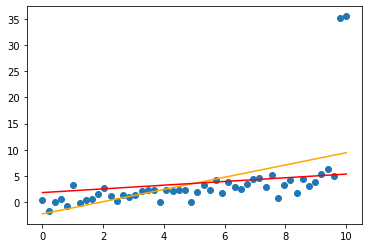

In [3]:
l2_model = Ridge(alpha=1000, fit_intercept=True)
l2_model.fit(X[:, np.newaxis], y)

X_plot2 = X
y_plot2 = l2_model.predict(X[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_plot, y_plot, c='orange')
plt.plot(X_plot2, y_plot2, c='red');

Ridge regression brought the regression line much closer to what we would expect a well-fitting regression to look like. 

> **Exercise**
>
> Rerun the code cell above with different values for the `alpha` parameter in the `Ridge()` function to see how it affects the slope of the red regression line.

Now let's see ridge regression in action in our experiment in Azure Machine Learning.

1. Delete the **Cross Validate Model** module.

2. From the left pane, drag new **Train Model** and **Score Model** modules onto the canvas under the **Linear Regression** module.

3. Connect the **Linear Regression** output to the upper-left receptor in the **Train Model** module, and connect the lower-left output of the **Split Data** module to the upper-right receptor in the **Train Model** module.

4. Connect **Train Model** to the upper-left receptor in the **Score Model** module, and connect the lower-right output in the **Split Data** module to the upper-right receptor in the **Score Model** module.

5. Connect **Score Model** to the upper-right receptor in the **Evaluate Model** module.

6. Click the **Train Model** module and select the **`lifeExpF`** column in the module's **Properties** pane.

7. Click the **Linear Regression** module and enter **`42`** for the random seed. In the **L2 regularization weight** field, enter **`0.1`**.
 
8. Run the experiment. When all modules have finished running, view the evaluation report.
 
> **Exercise**
>
> Change the L2 regularization weight on both **Linear Regression** modules to different numbers (such as `0.2` and `0.01`), and compare the new $R^2$ scores to these current ones.

> **Question**
>
> What does this tell you about tuning your models?